In [1]:
file_path = '/home/jiongyi/Documents/bead_motility/2019_10_17/exp_04/470_egfp_wave_pwca_550_a568_pulse_640_a647_chase_actin_7/470_egfp_wave_pwca_550_a568_pulse_640_a647_chase_actin_7_MMStack.ome.tif'

In [2]:
from skimage.io import imread
mm_stack = imread(file_path)
print(mm_stack.shape)

(512, 512, 3)


In [3]:
npf_im = mm_stack[:, :, 0]
pulse_im = mm_stack[:, :, 1]
chase_im = mm_stack[:, :, 2]

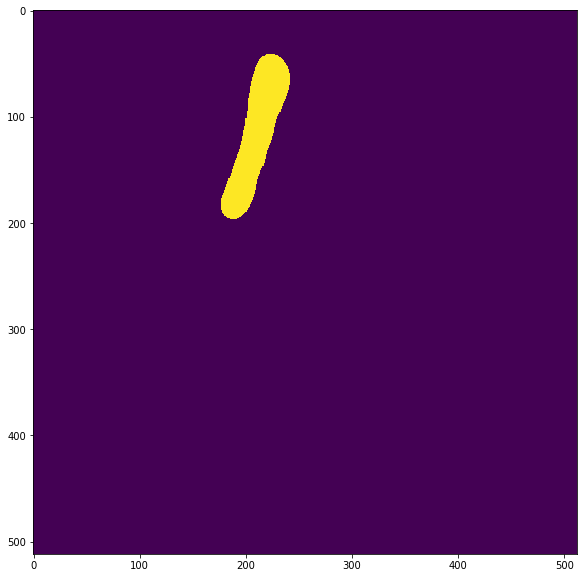

In [4]:
%matplotlib inline
from matplotlib.pyplot import subplots
from numpy import max, mean, std
from skimage.filters import gaussian

sum_im = npf_im / max(npf_im.flatten()) + pulse_im / max(pulse_im.flatten()) + chase_im / max(chase_im.flatten())
sum_im = gaussian(sum_im, sigma = 2)
fig1_hand, axes1_hand = subplots()
fig1_hand.set_figheight(10)
fig1_hand.set_figwidth(10)
bw_im = sum_im > (mean(sum_im) + 3 * std(sum_im))
axes1_hand.imshow(sum_im > mean(sum_im) + (3 * std(sum_im)))

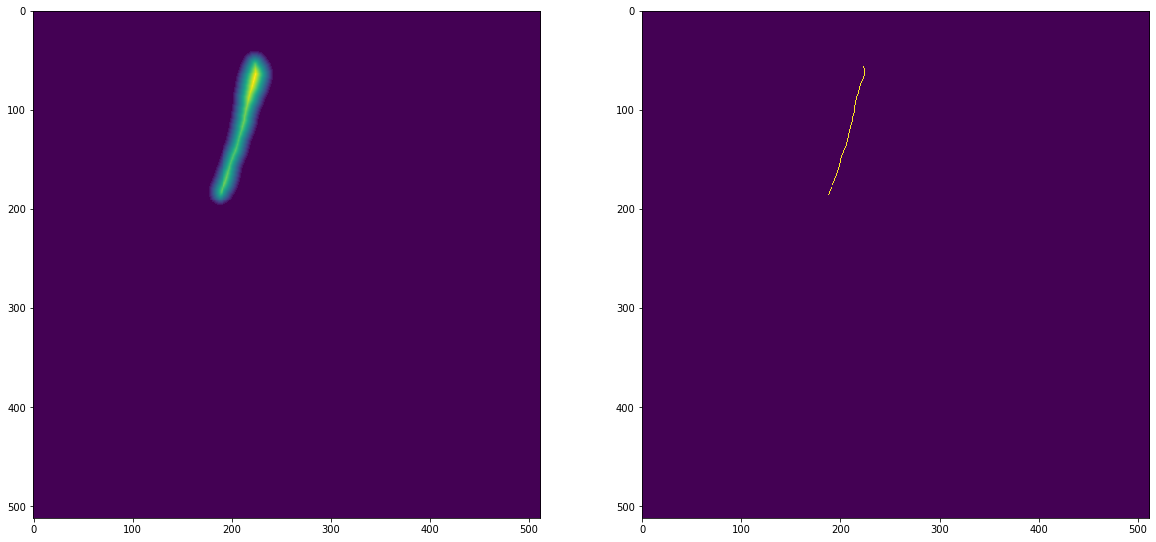

In [5]:
from scipy.ndimage.morphology import distance_transform_edt
from skimage.morphology import skeletonize, medial_axis
distance_im = distance_transform_edt(bw_im)
fig2_hand, axes2_hand = subplots(ncols = 2, nrows = 1)
fig2_hand.set_figheight(10)
fig2_hand.set_figwidth(20)
axes2_hand[0].imshow(distance_im)
axes2_hand[1].imshow(skeletonize(bw_im))
